In [1]:
df <- data.frame(
  x = c(3, 1, 5), 
  y = c(2, 4, 6), 
  label = c("a","b","c")
)

In [2]:
df

x,y,label
<dbl>,<dbl>,<chr>
3,2,a
1,4,b
5,6,c


In [3]:
p <- ggplot(df, aes(x, y, label = label)) + 
  labs(x = NULL, y = NULL) + # Hide axis label
  theme(plot.title = element_text(size = 12)) # Shrink plot title

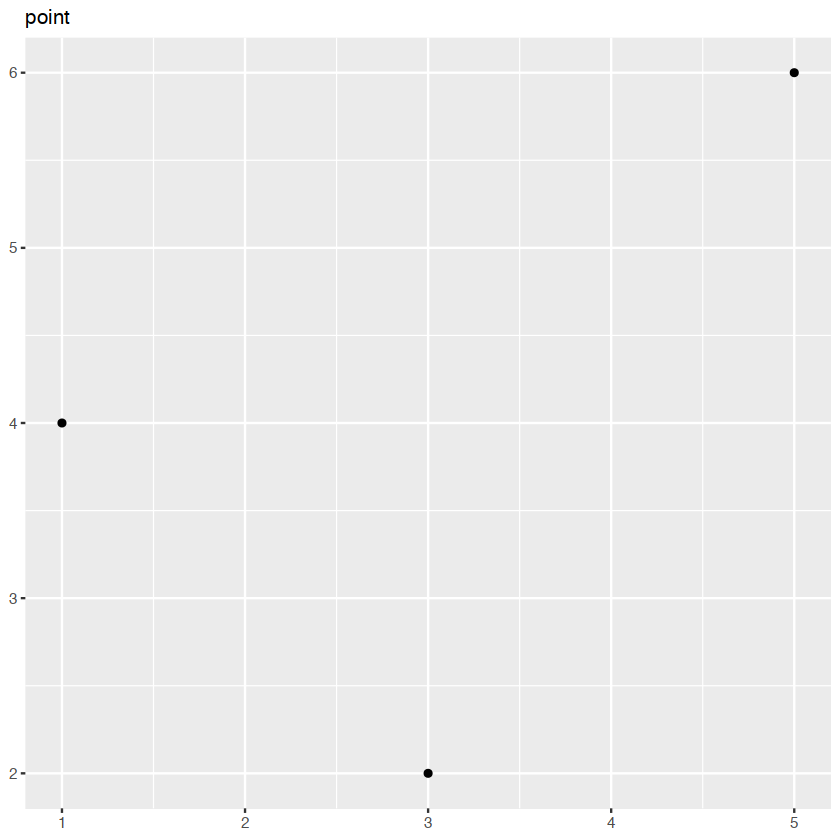

In [4]:
p + geom_point() + ggtitle("point")


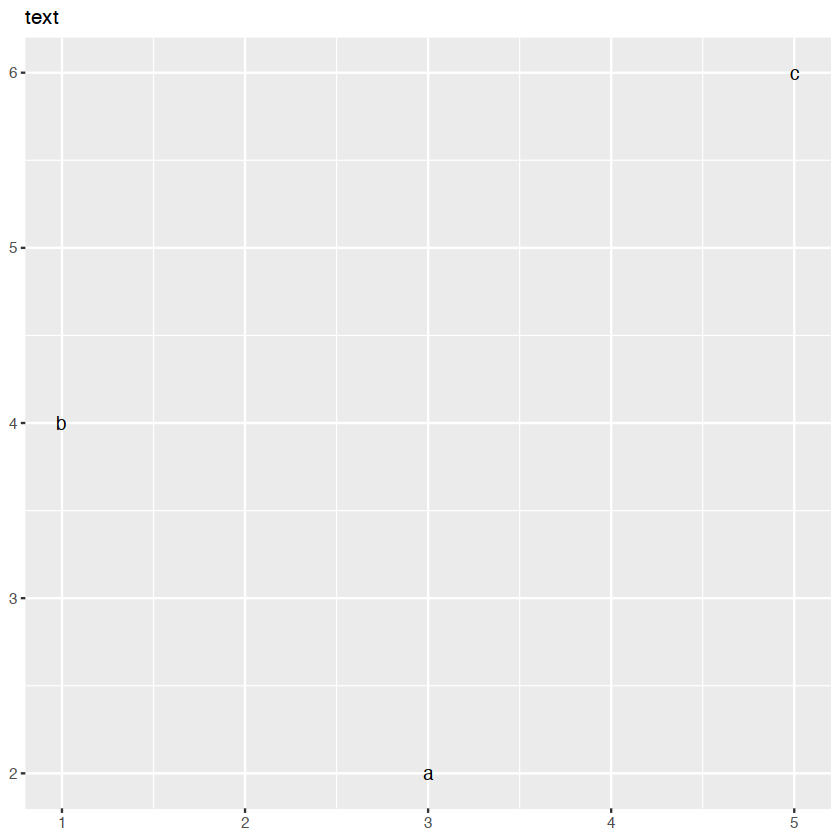

In [5]:
p + geom_text() + ggtitle("text")

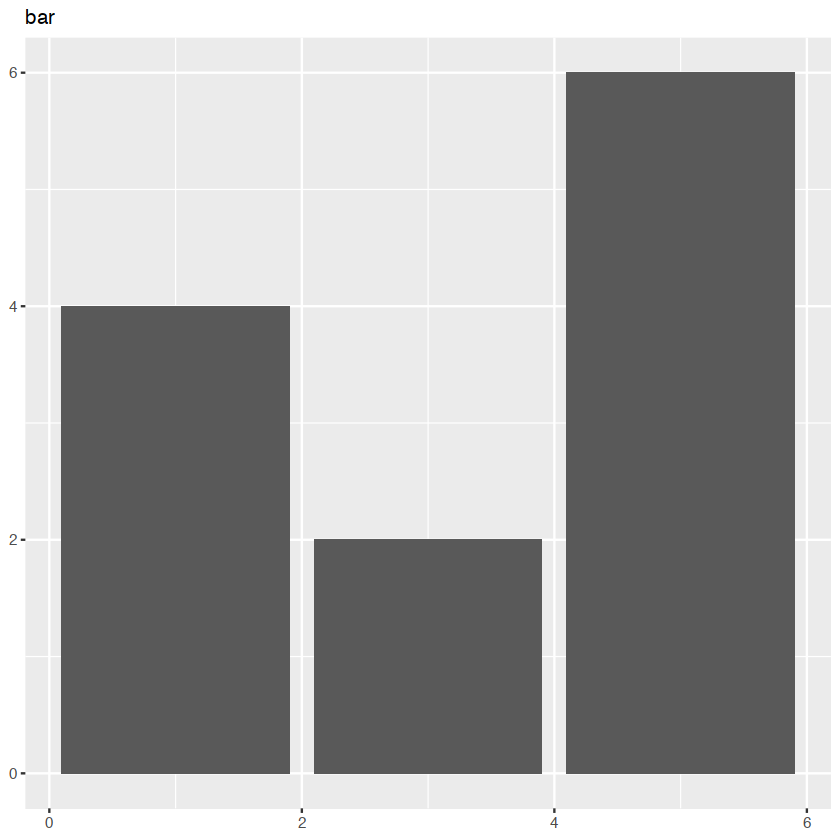

In [5]:
p + geom_bar(stat = "identity") + ggtitle("bar")


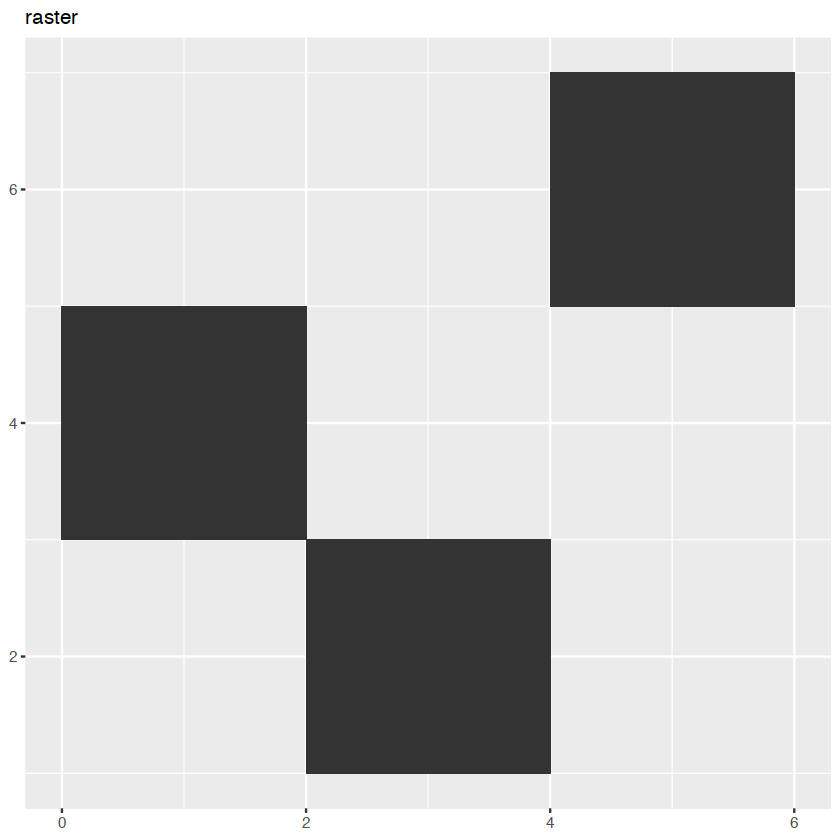

In [7]:
p + geom_tile() + ggtitle("raster")

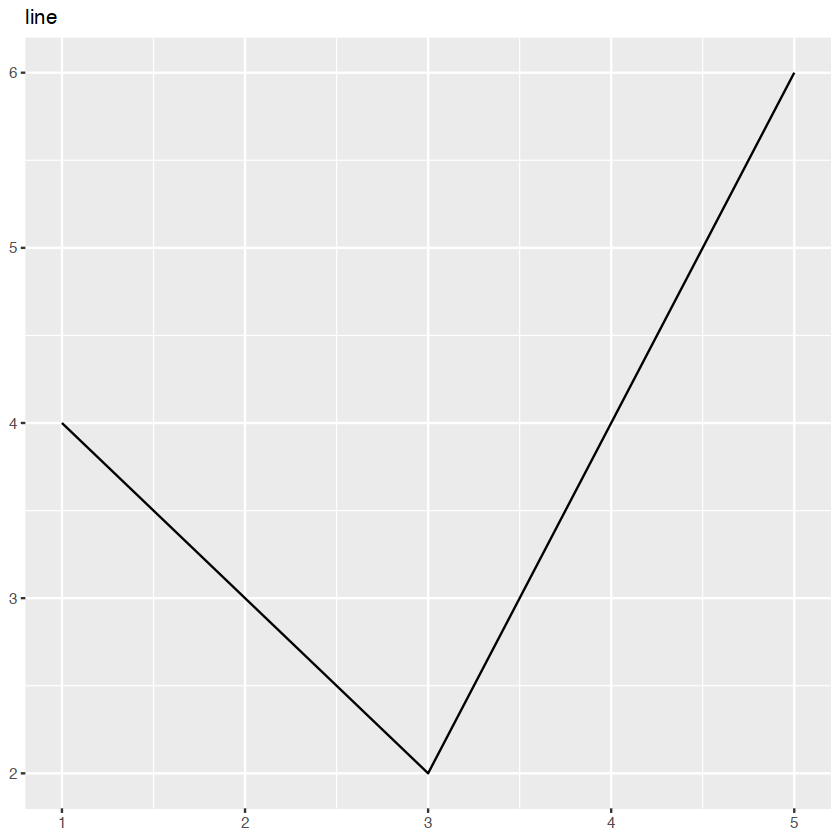

In [8]:
p + geom_line() + ggtitle("line")

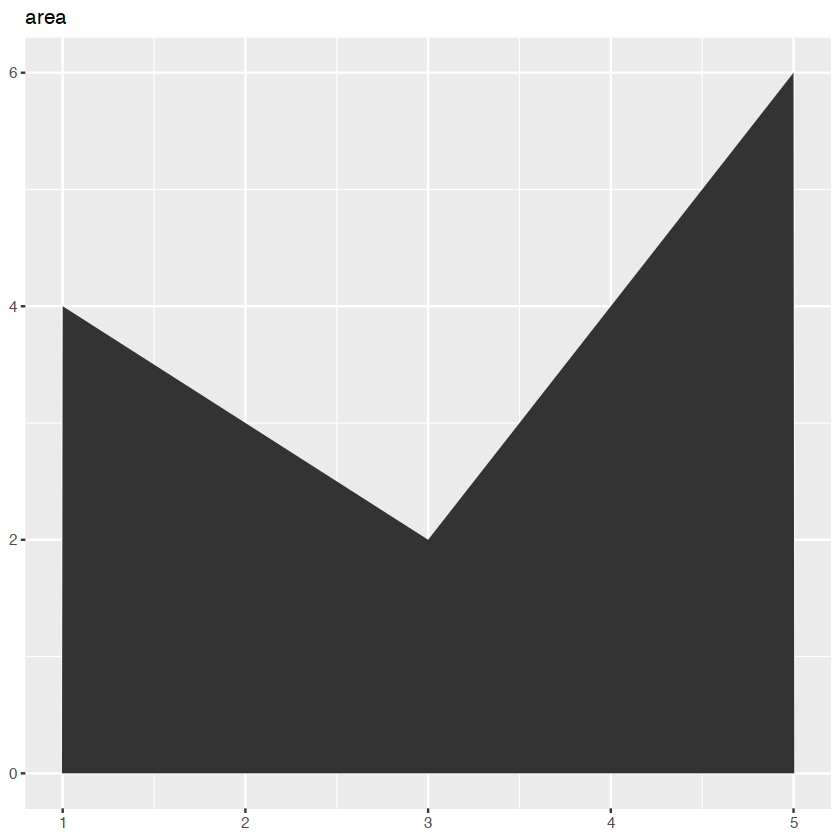

In [9]:
p + geom_area()+ggtitle("area")

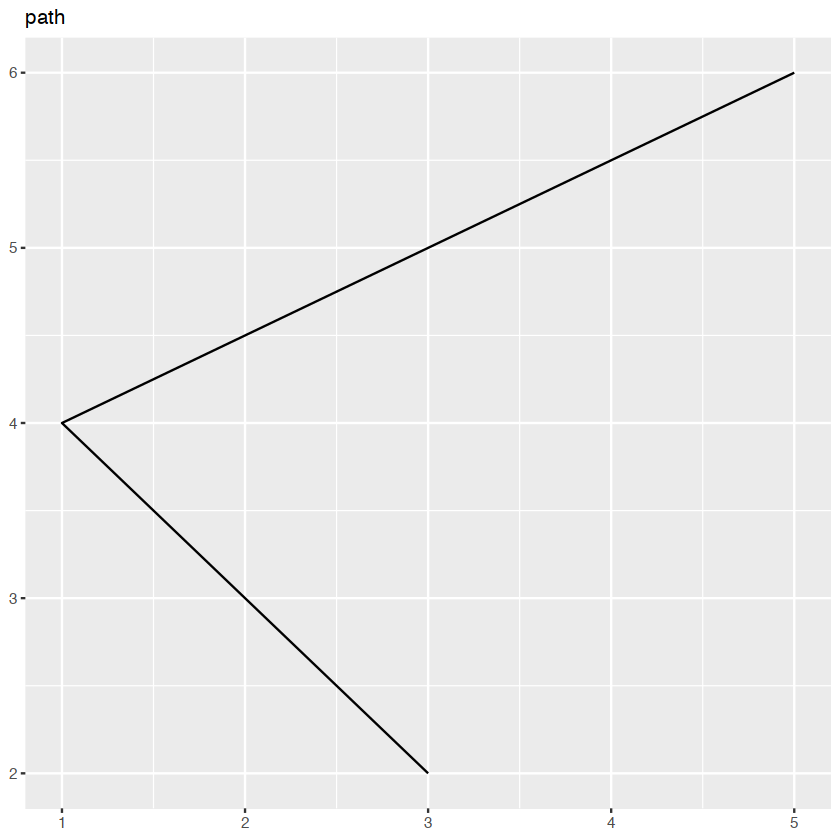

In [10]:
p + geom_path() + ggtitle("path")

### collective geoms

Geoms can be roughly divided into individual and collective geoms. 

#### different groups on different layers

we want to plot summaries that use different levels of **aggregation**.

In [11]:
data(Oxboys, package = "nlme")
head(Oxboys)

,Subject,age,height,Occasion
,<ord>,<dbl>,<dbl>,<ord>
1,1,-1.0000,140.5,1
2,1,-0.7479,143.4,2
3,1,-0.4630,144.8,3
4,1,-0.1643,147.1,4
5,1,-0.0027,147.7,5
6,1,0.2466,150.2,6


`geom_smooth()` using formula = 'y ~ x'


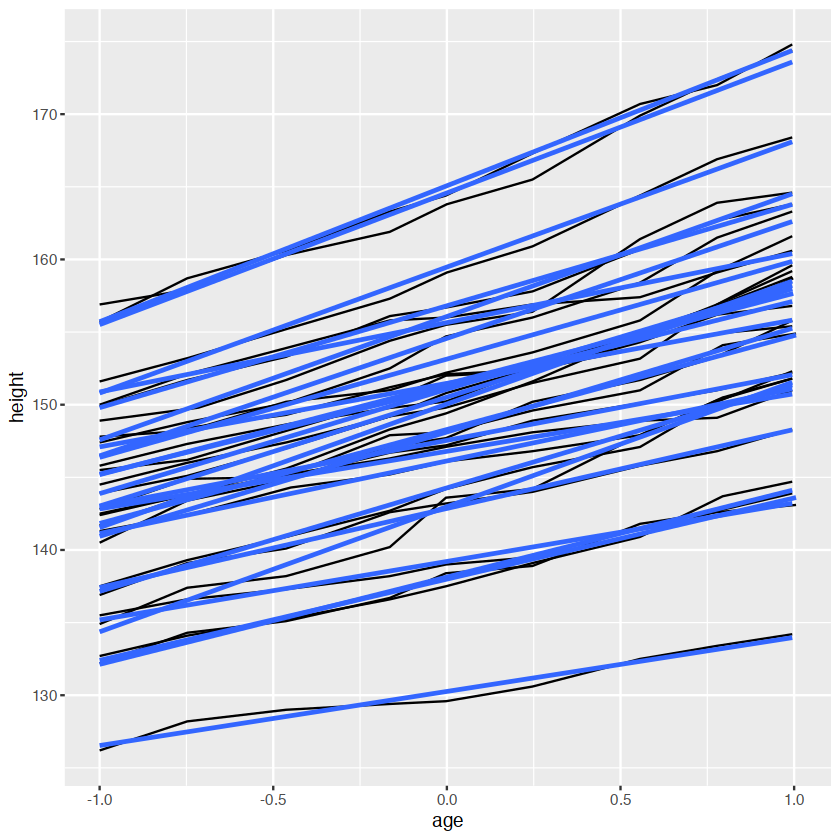

In [12]:
ggplot(Oxboys, aes(age, height, group = Subject)) + 
  geom_line() + 
  geom_smooth(method = "lm", se = FALSE)
#> `geom_smooth()` using formula 'y ~ x'

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


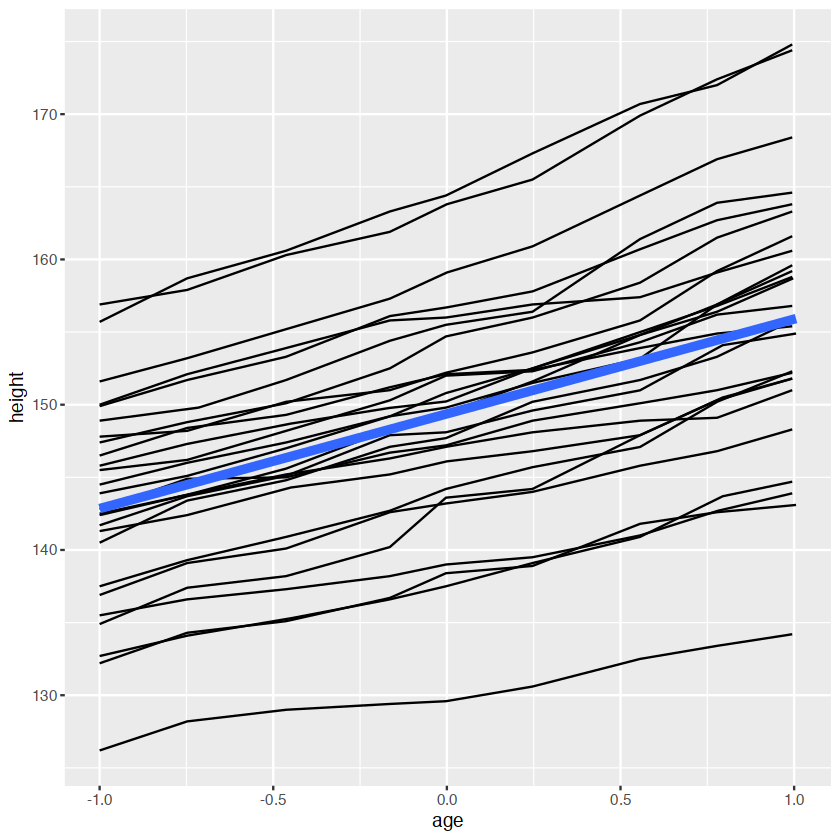

In [13]:
ggplot(Oxboys, aes(age, height)) + 
  geom_line(aes(group = Subject)) + 
  geom_smooth(method = "lm", size = 2, se = FALSE)


In [14]:
head(Oxboys)

,Subject,age,height,Occasion
,<ord>,<dbl>,<dbl>,<ord>
1,1,-1.0000,140.5,1
2,1,-0.7479,143.4,2
3,1,-0.4630,144.8,3
4,1,-0.1643,147.1,4
5,1,-0.0027,147.7,5
6,1,0.2466,150.2,6


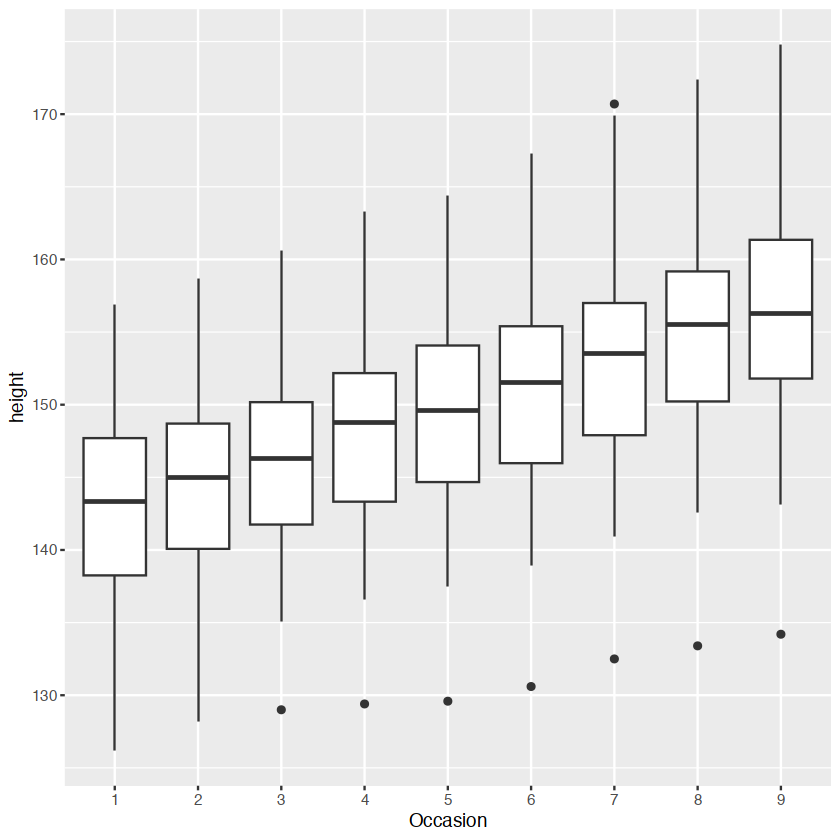

In [15]:
ggplot(Oxboys,aes(Occasion,height))+
    geom_boxplot()

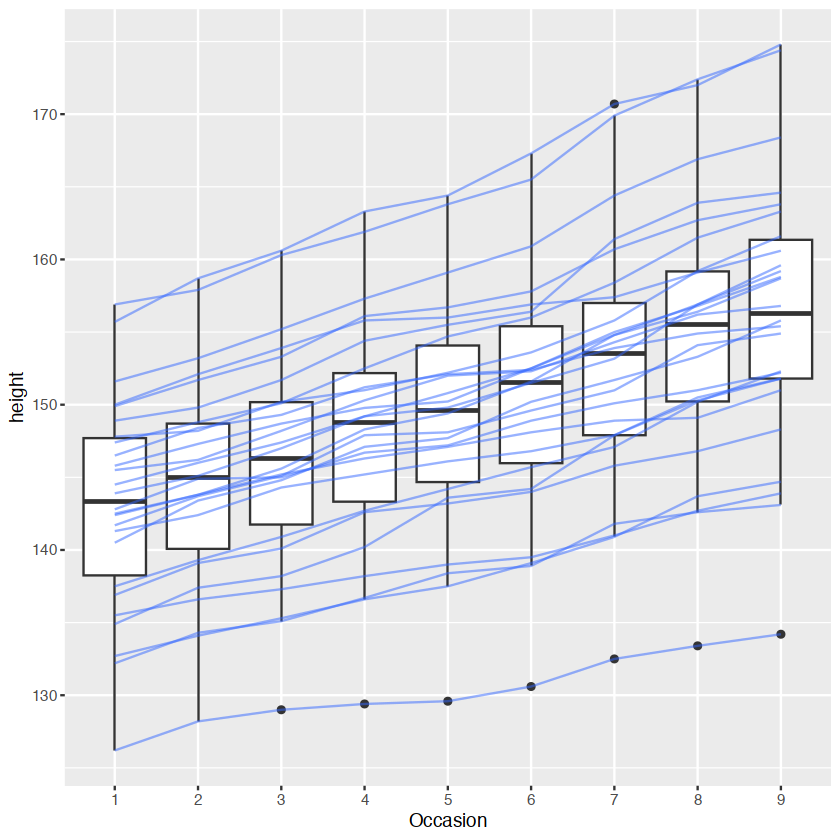

In [16]:
ggplot(Oxboys, aes(Occasion, height)) + 
  geom_boxplot() +
  geom_line(aes(group = Subject), colour = "#3366FF", alpha = 0.5)

#### matching aesthetics to graphic objects

- lines and paths operate on the first value principle: each segment is defined by two observations
- ggplot2 applies the aesthetic value associated with the first observation when drawing the segment.

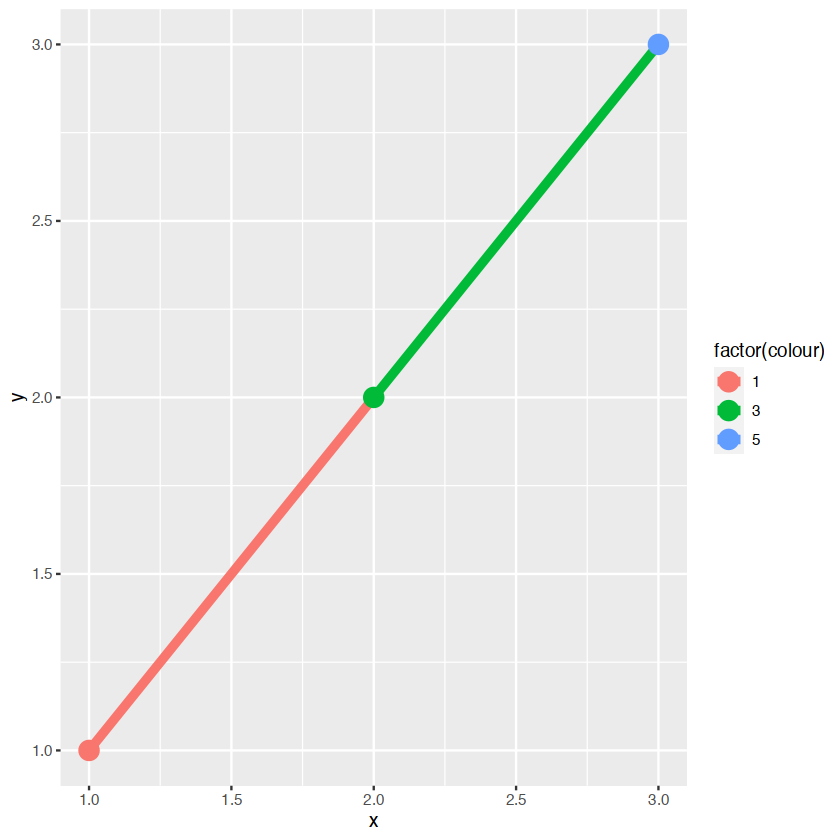

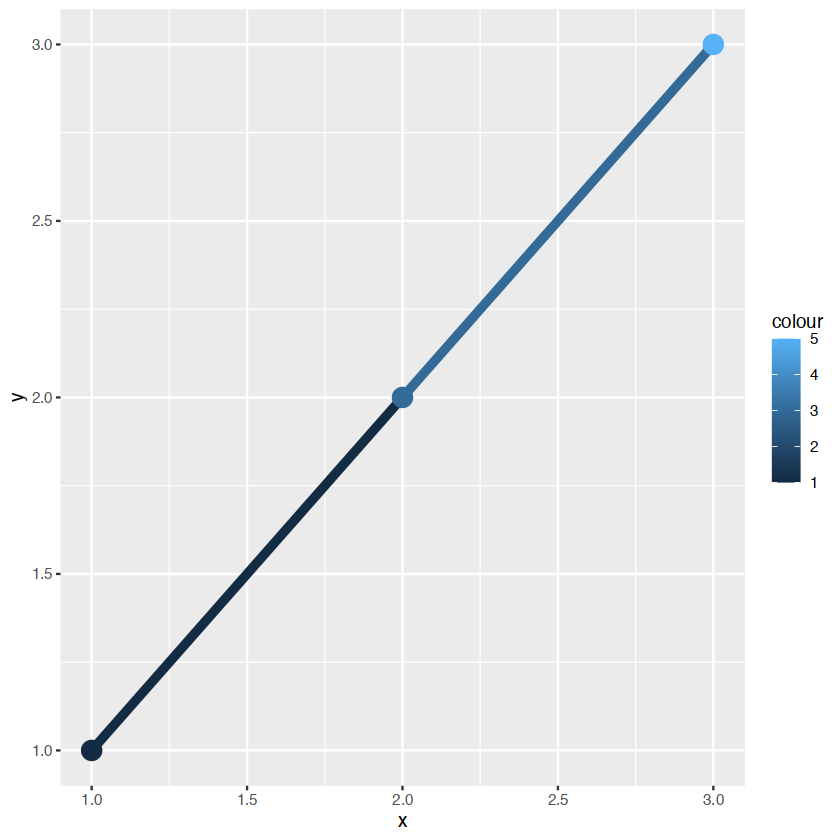

In [17]:
df <- data.frame(x = 1:3, y = 1:3, colour = c(1,3,5))

ggplot(df, aes(x, y, colour = factor(colour))) + 
  geom_line( aes(group = 1),size = 2) +
  geom_point(size = 5)

ggplot(df, aes(x, y, colour = colour)) + 
  geom_line(aes(group = 1),size = 2) +
  geom_point(size = 5)

在左手边的颜色是离散的，右手边是连续的，即使颜色变量是连续的，`ggplot`不会平滑

Warning message:
“The dot-dot notation (`..prop..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(prop)` instead.”


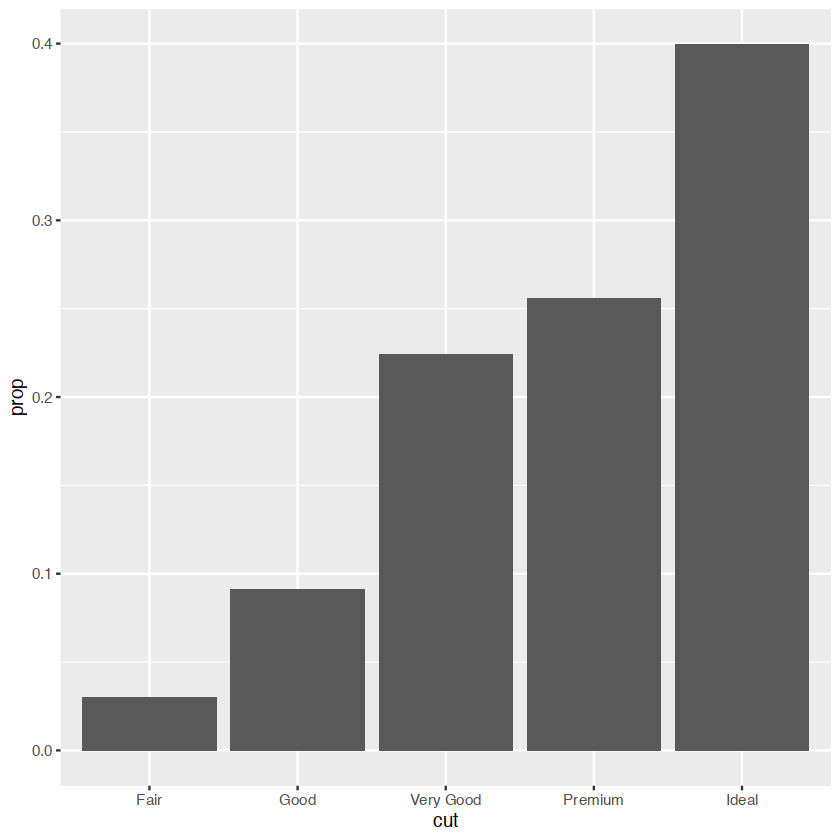

In [18]:
library(ggplot2)
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

`group="whatever"` 是一个"虚拟"分组来覆盖默认行为，(这里)是按 `cut` 分组，通常是按x 变量.`geom_bar `的默认值是按 `x` 变量分组，以便分别计算 `x` 变量的每个级别中的行数.例如，在这里，`geom_bar `默认返回` cut` 等于`"Fair"`、`"Good"`等的行数.

但是，如果我们想要比例，那么我们需要将所有级别的` cut `一起考虑.在第二个图中，数据首先按` cut `分组，因此分别考虑 `cut `的每个级别.`Fair in Fair` 的比例是 100%，`Good in Good` 等的比例也是如此.`group=1`(或 `group="x"` 等)阻止了这一点，因此每个级别的削减比例将**相对于**所有削减水平.



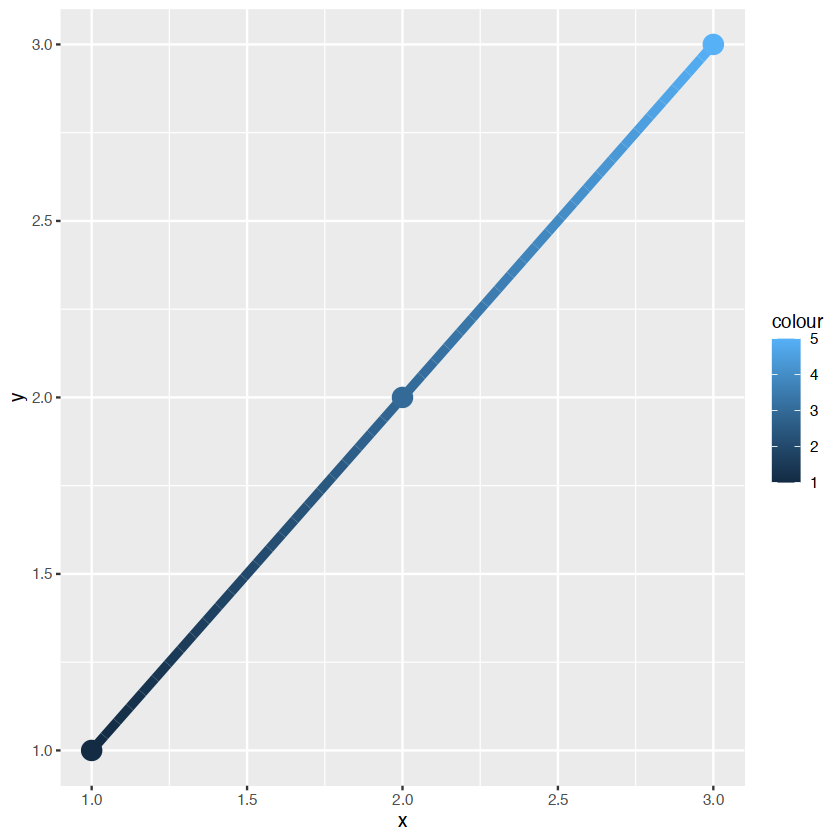

In [19]:
xgrid <- with(df, seq(min(x), max(x), length = 50))
interp <- data.frame(
  x = xgrid,
  y = approx(df$x, df$y, xout = xgrid)$y,
  colour = approx(df$x, df$colour, xout = xgrid)$y  
)
ggplot(interp, aes(x, y, colour = colour)) + 
  geom_line(size = 2) +
  geom_point(data = df, size = 5)

若我们要进行混合渐变形式，

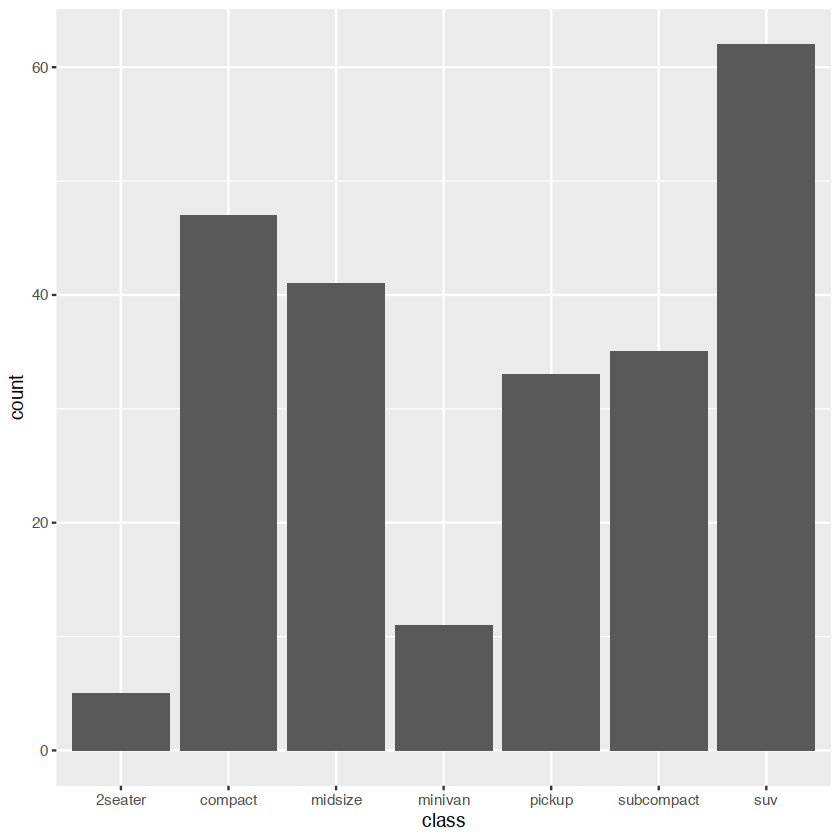

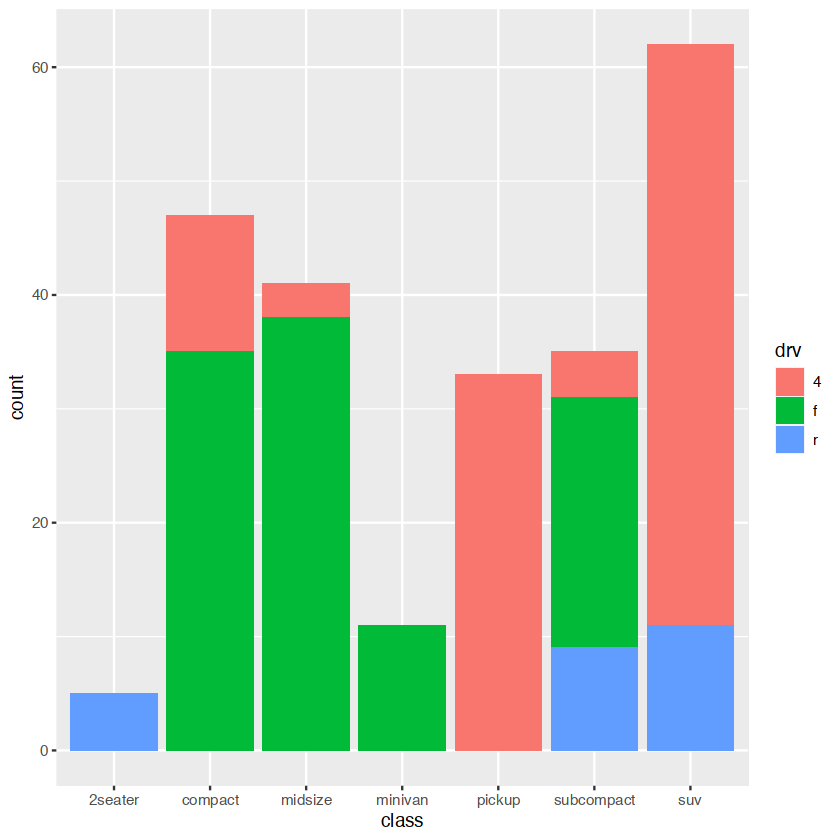

In [20]:
ggplot(mpg, aes(class)) + 
  geom_bar()
ggplot(mpg, aes(class, fill = drv)) + 
  geom_bar()

显示多种颜色，需要多种的bars对于每一个`class`

### statistical summaries

A layer combines data, aesthetic mapping, a geom (geometric object), a stat (statistical transformation), and a position adjustment. Typically, you will create layers using a geom_ function, overriding the default position and stat if needed.


#### revealing uncertainty

having the infomation about the uncertainty present in your idea

- discrete x,range:`geom_errorbar()`,`geom)linerange()`
- discrete x,range&center:`geom_crossbar()`,`geom_pointrange()`
- continuous x,range:`geom_ribbon()`
- continuous x,range&center:`geom_smooth(stat="identity")`

In [21]:
y <- c(18,11,16)
df <- data.frame(x=1:3,y=y,se=c(1.2,0.5,1.0))

base <- ggplot(df,aes(x,y,ymin=y-se,ymax=y+se))

##### 箱线图

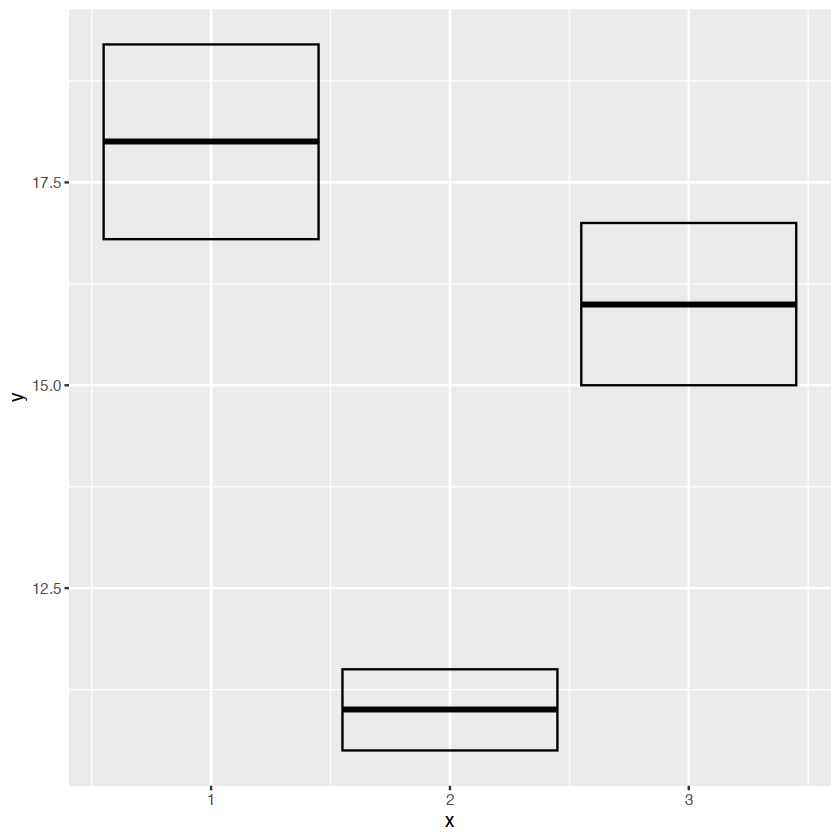

In [22]:
base+geom_crossbar()

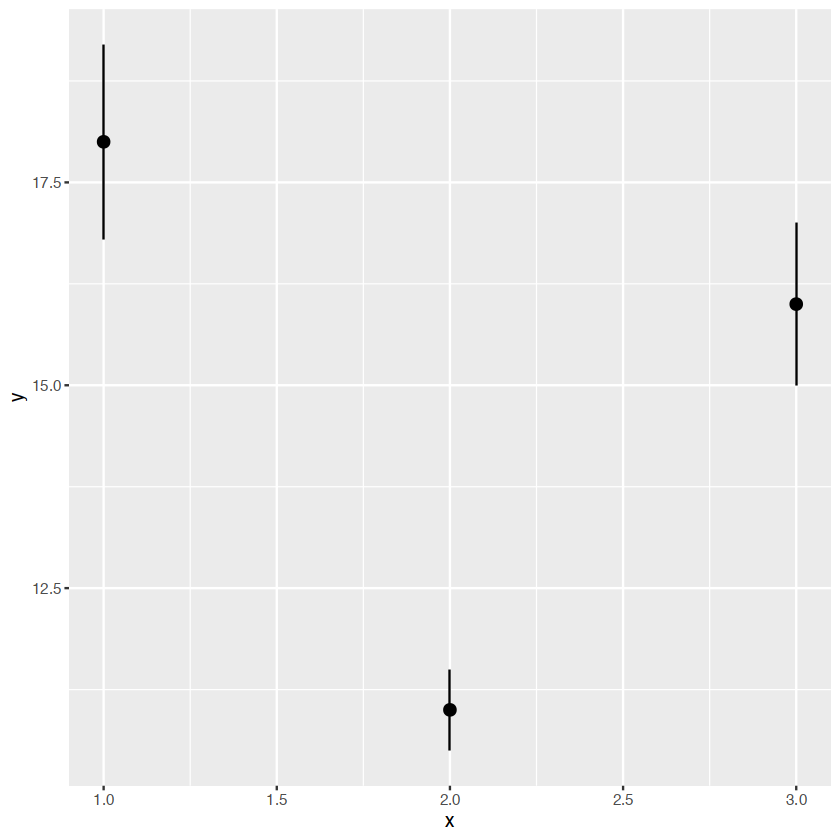

In [23]:
base+geom_pointrange()

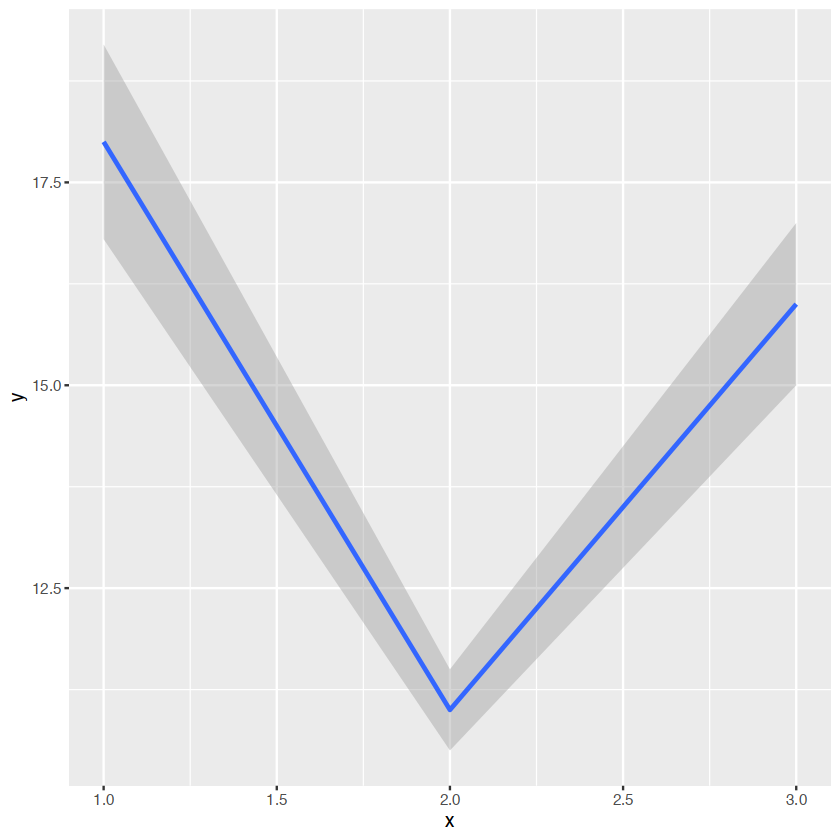

In [24]:
base+geom_smooth(stat="identity")

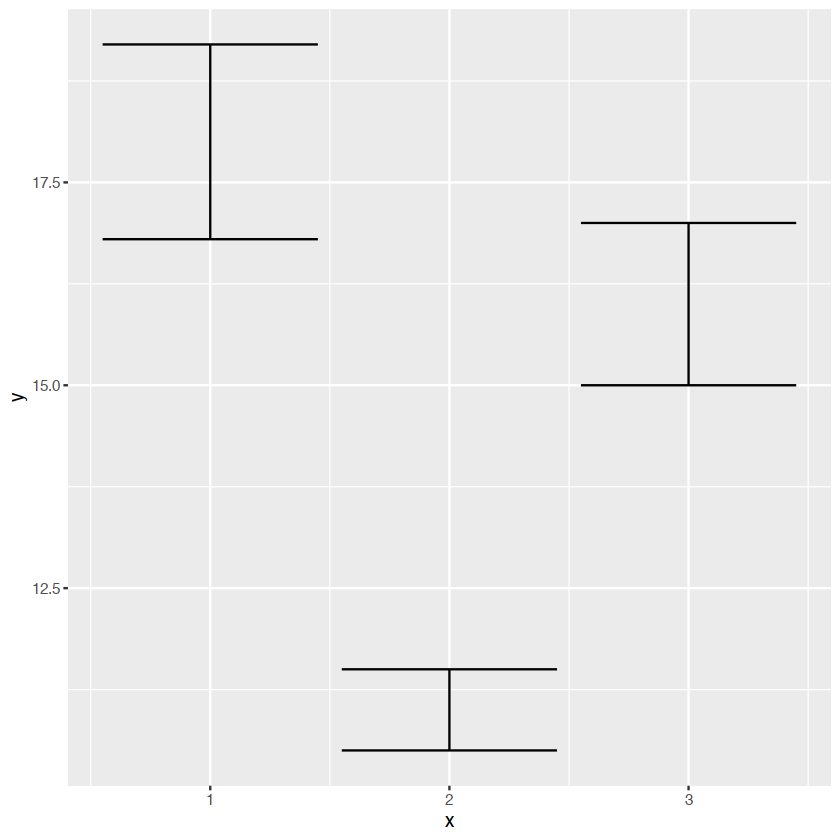

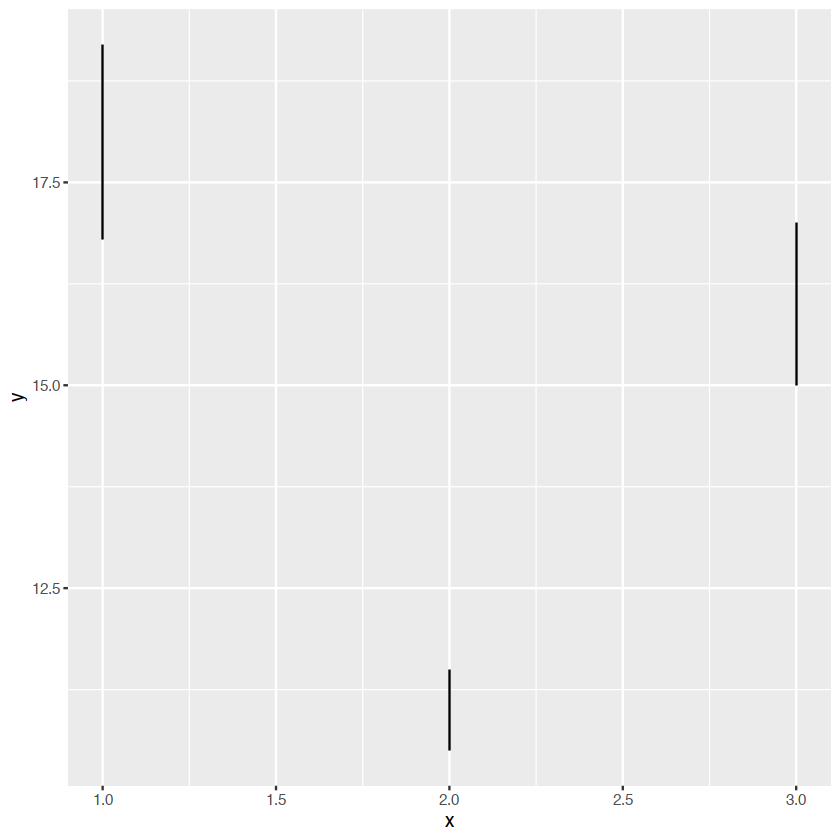

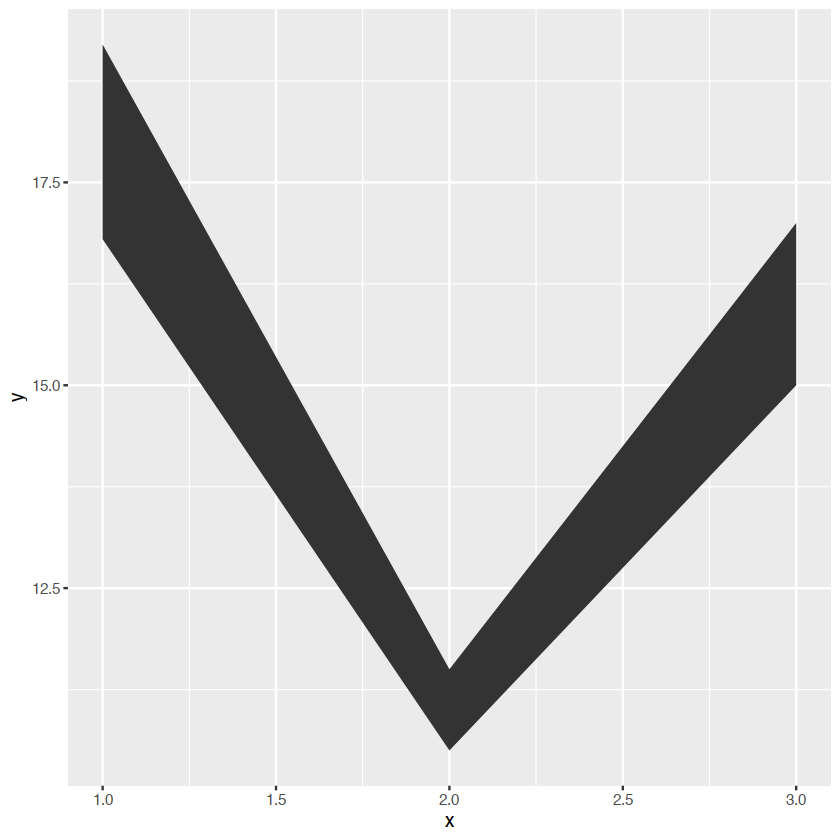

In [31]:
base+geom_errorbar()
base+geom_linerange()
base+geom_ribbon()

#### weighted data

#### dealing with overplotting

constructing a bi-gauss distribution

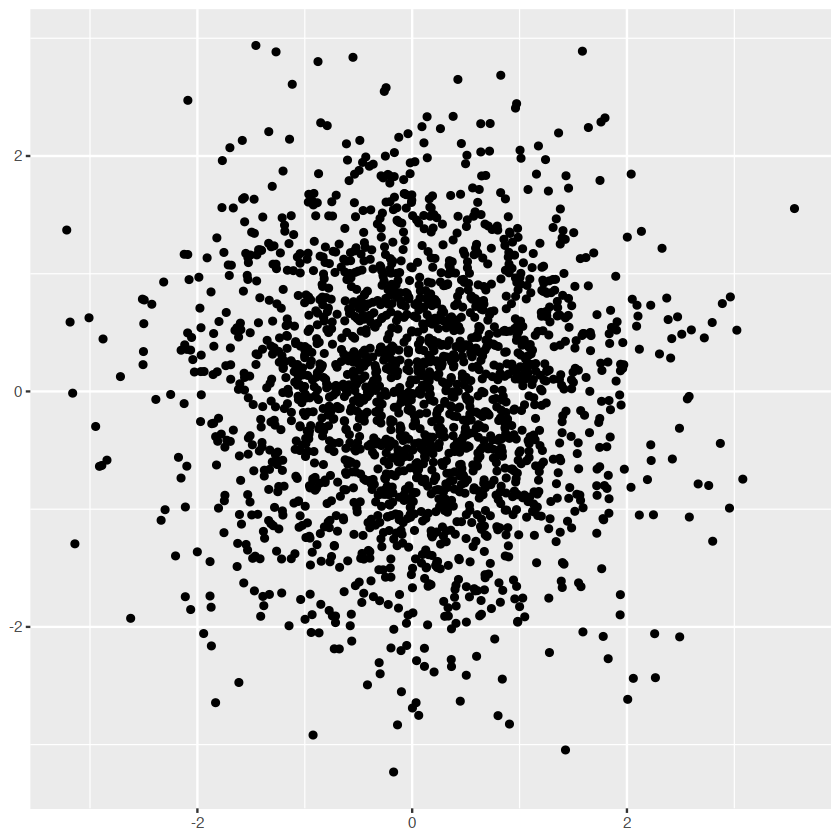

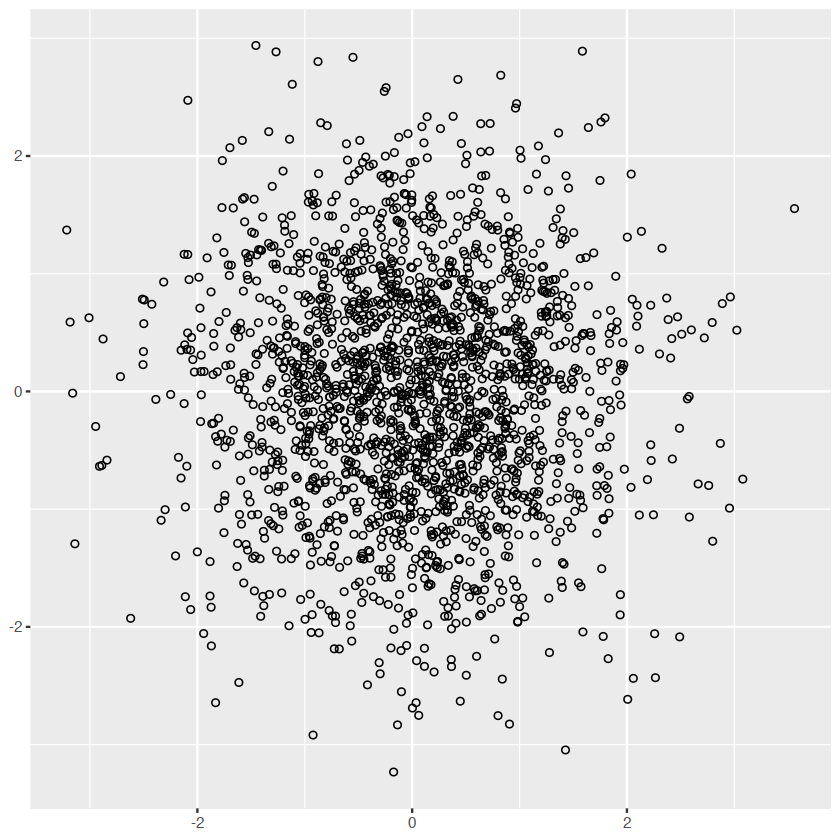

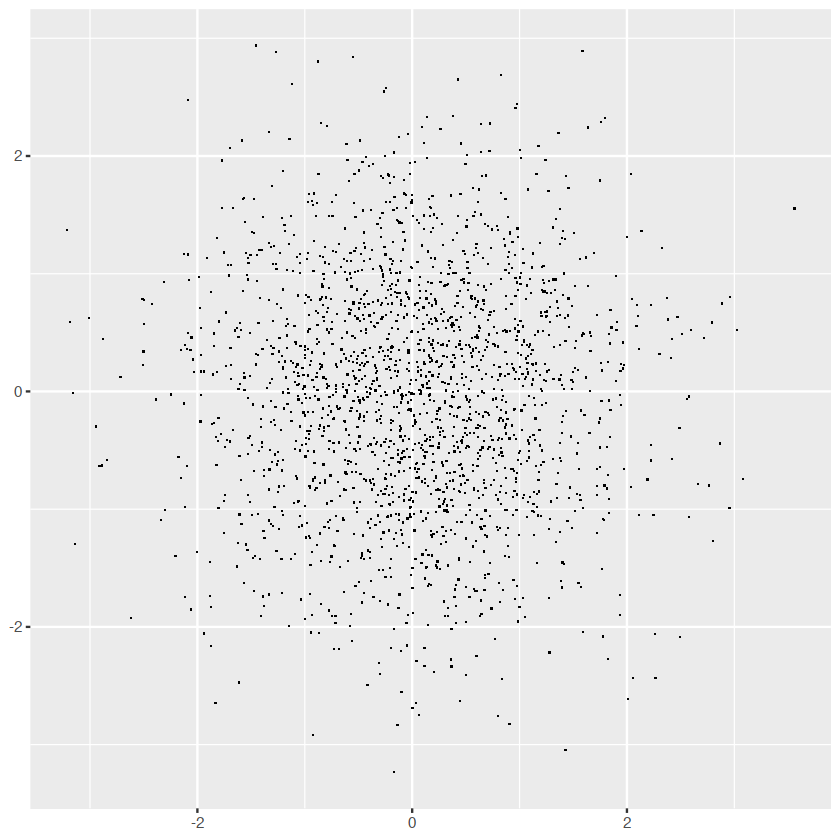

In [35]:
df <- data.frame(x = rnorm(2000), y = rnorm(2000))
norm <- ggplot(df, aes(x, y)) + xlab(NULL) + ylab(NULL)
norm + geom_point()
norm + geom_point(shape = 1) # Hollow circles "1"is circle,"2"is rectangle
norm + geom_point(shape = ".") # Pixel sized

##### adjust the opacity

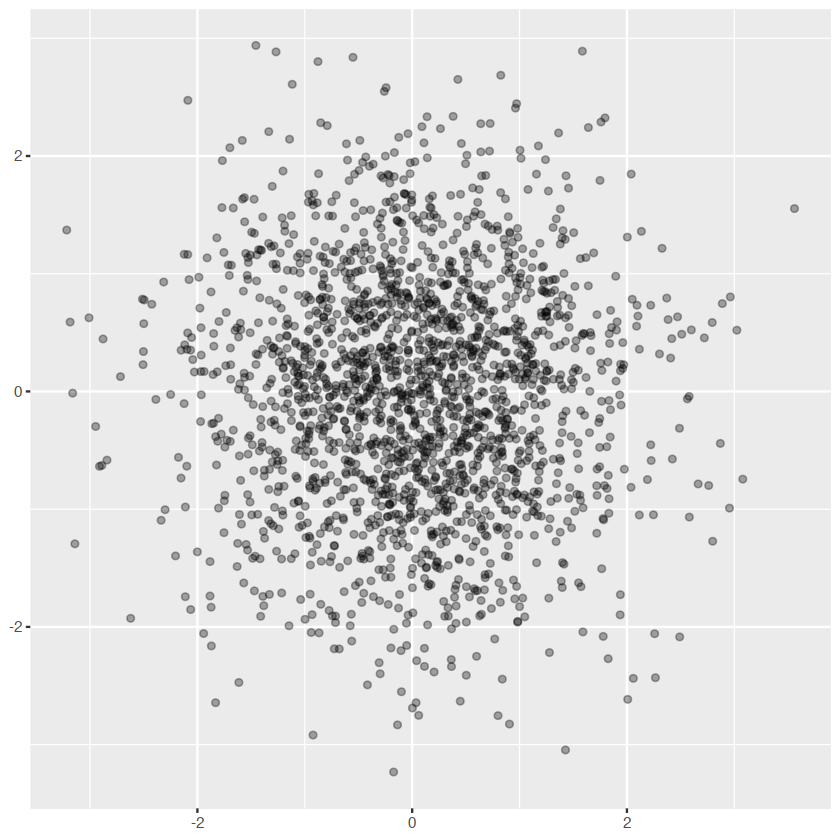

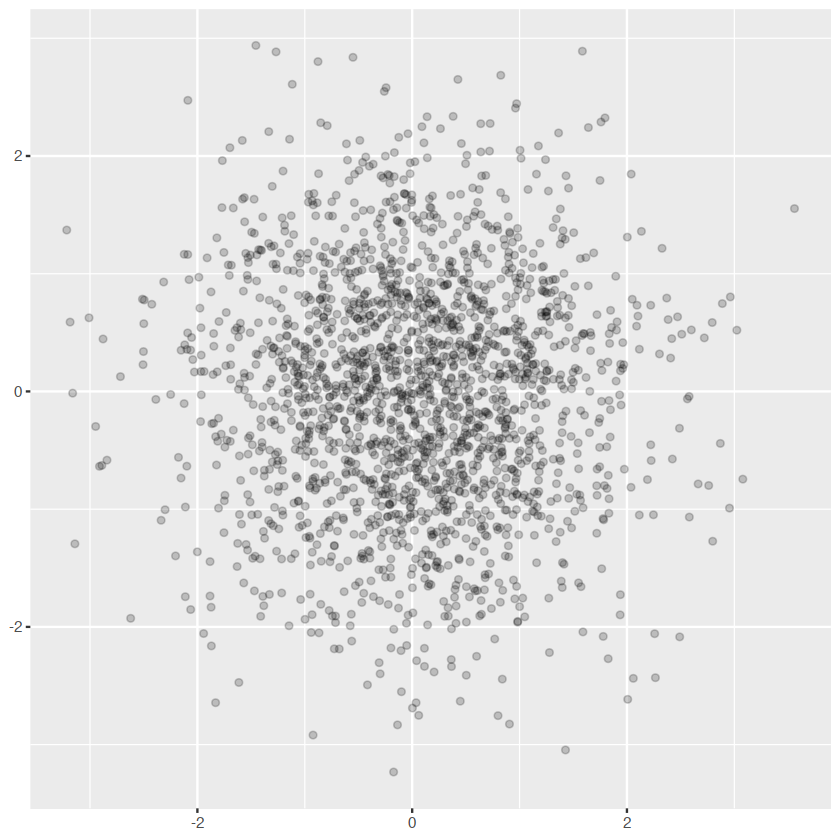

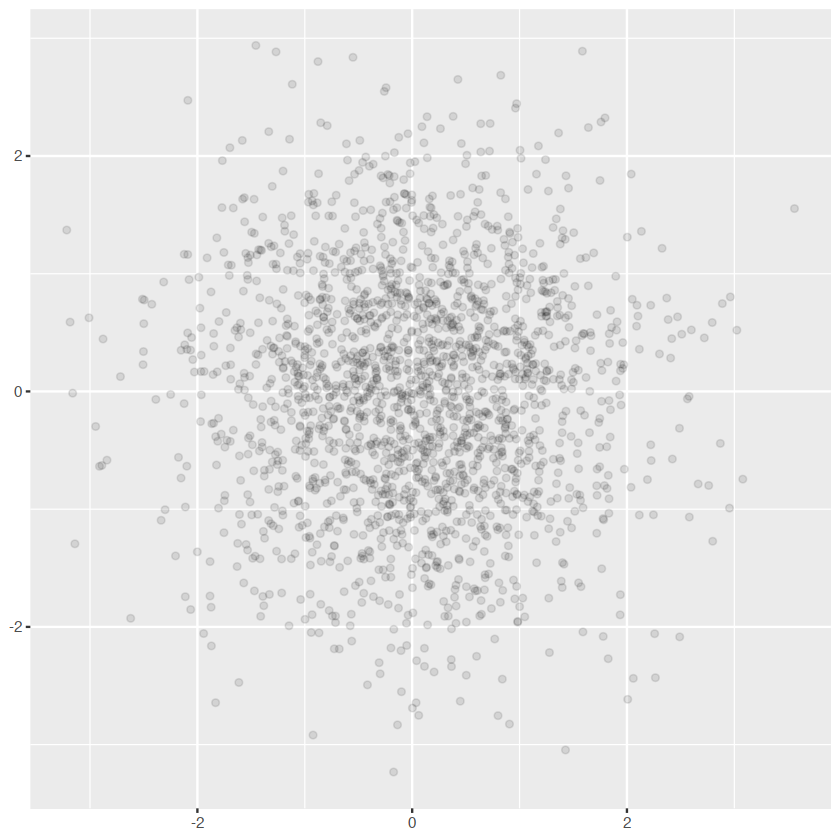

In [36]:
norm + geom_point(alpha = 1 / 3)
norm + geom_point(alpha = 1 / 5)
norm + geom_point(alpha = 1 / 10)

In [ ]:
norm

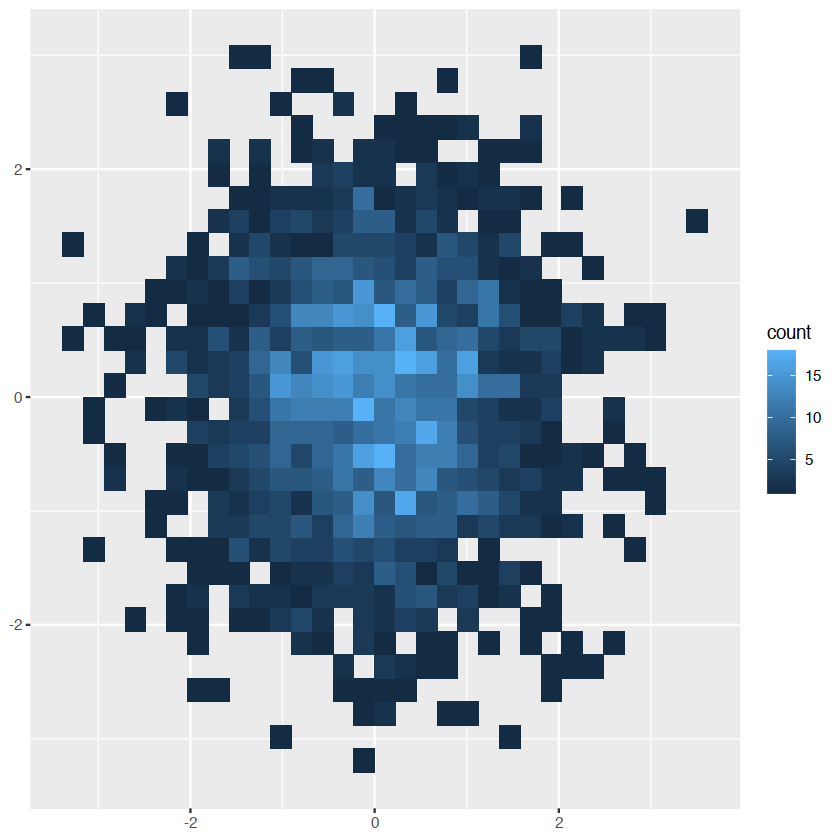

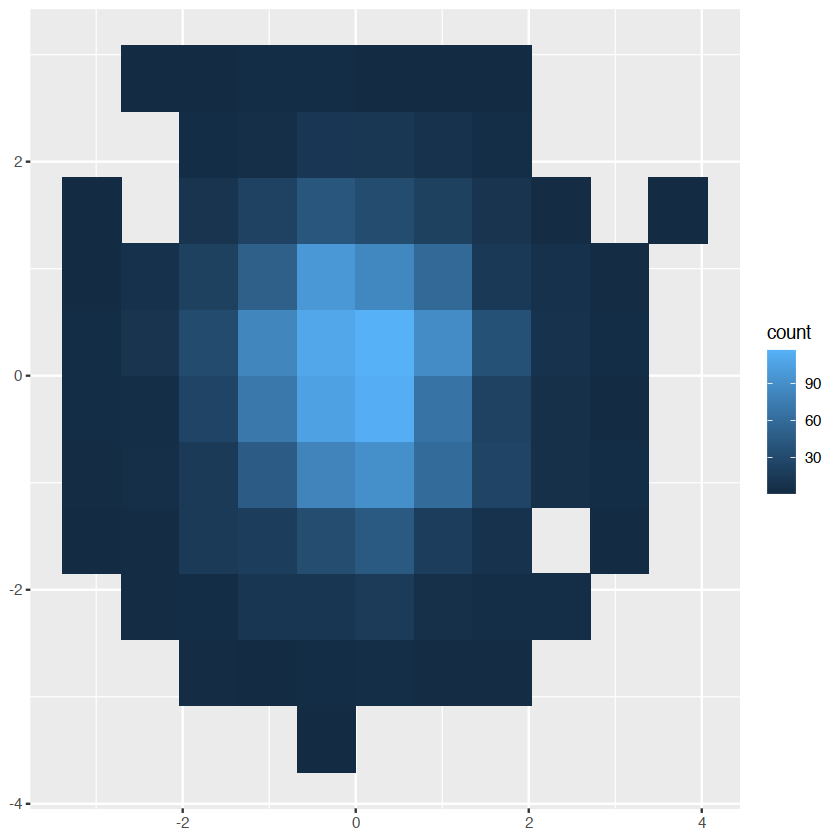

In [38]:
norm +geom_bin2d()
norm + geom_bin2d(bins=10)

- Estimate the 2d density with `stat_density2d()`


#### Statistical summaries

In [ ]:
bar

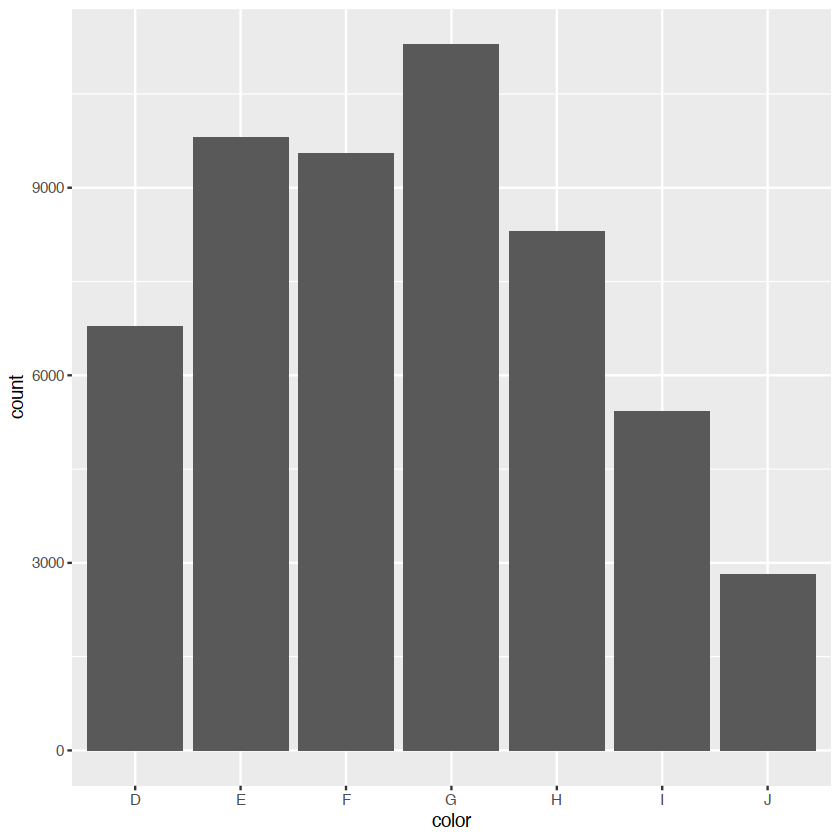

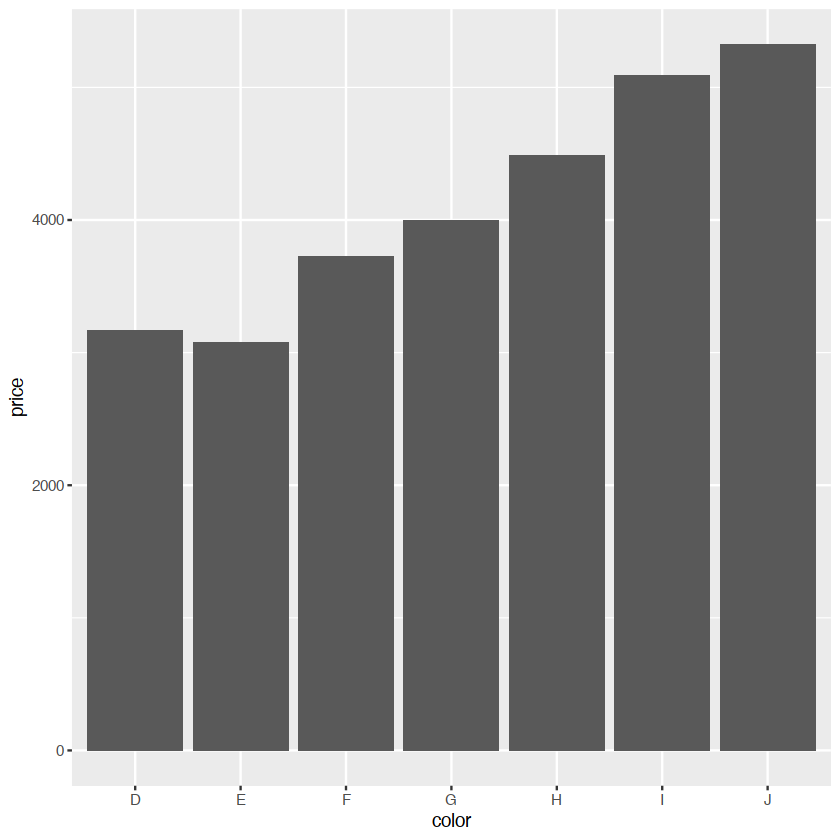

In [44]:
ggplot(diamonds, aes(color)) + 
  geom_bar()

ggplot(diamonds, aes(color, price)) + 
  geom_bar(stat = "summary_bin", fun = mean)

#### surfaces 

we are considered two classes of geoms:
- simple geoms where there's a one-on-one correspondence between rows in the data
- statistical geoms where introduce a layer of statistical 
summaries in between the raw data and the fault
- we will consider cases where a visualization of a three dimensional surface

In [46]:
data(faithfuld)

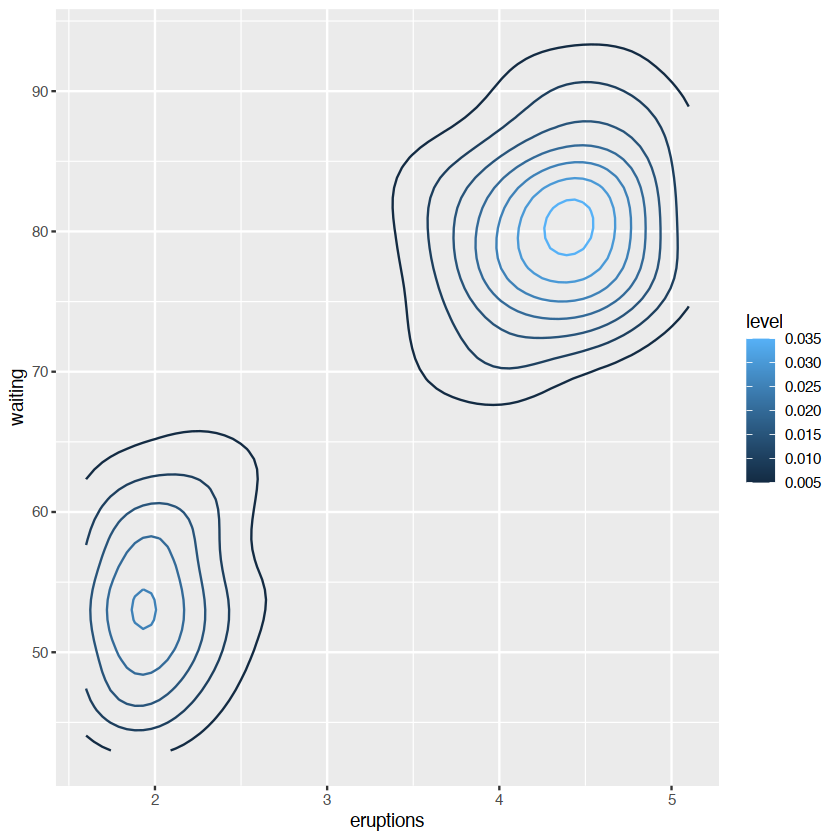

In [47]:
ggplot(faithfuld,aes(eruptions,waiting))+
    geom_contour(aes(z=density,color=..level..))

 `..level..` 变量
 
 `..`意味着一个内部计算的变量

演示相同的分布做一个热力图

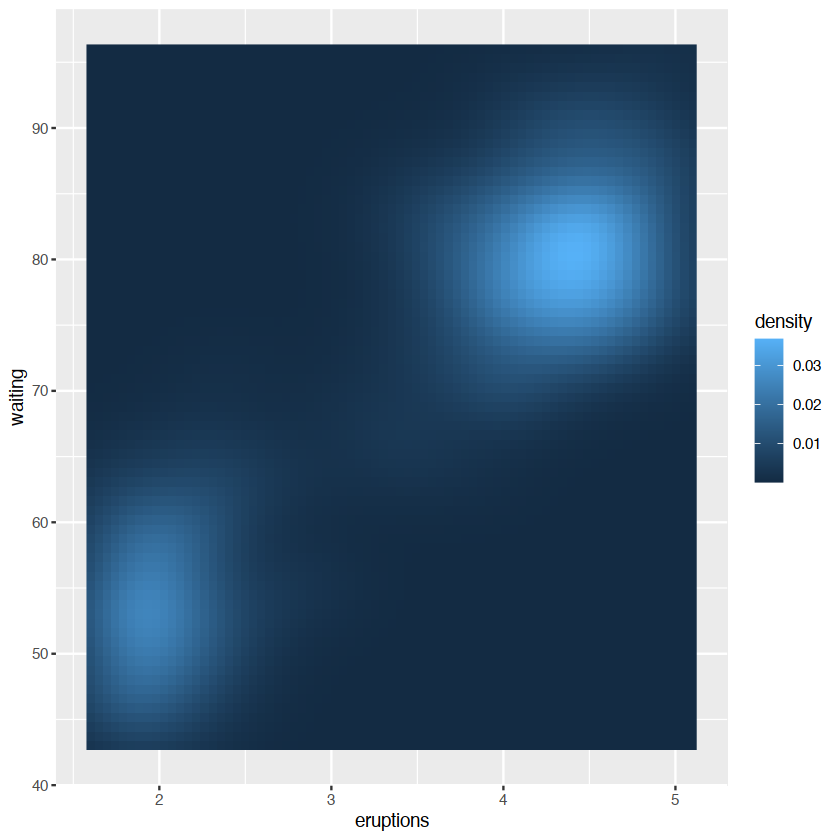

In [50]:
ggplot(faithfuld, aes(eruptions, waiting)) + 
  geom_raster(aes(fill = density))

#### generated variables

a stat takes a data frame as input and returns a data frame as output, and so a stat can add new variables to the original dataset

### Geoms

geometric objects or geoms for short,perform the actual rendering of the layer, controlling the type of plot that you create.

- graphical primitives:
    - `geom_blank()`：啥也没有
    - `geom_point()`points
    - `geom_path()`
    - `geom_rect()` rectangles.
    - `geom_ploygon()` filled polygons.
    - `geom_text()`

- One variable:
    - discrete
    - continuous
- two variables:
    - both continuous:
        - `geom_point()`
        - `geom_smooth()`



- three variables:
    - `geom_contour()`
    - `geom_tile()`
    - `geom_raster()`: fast version of `geom_tile()` for equal sized tiles

### Stats

统计变换，或统计转换数据，通常是用某种方式来总结它

- `stat_bin()`
- `stat_bin2d()`
- `stat_bindot()`
- `stat_binplot()`

other stats can't be created with a `geom_` function

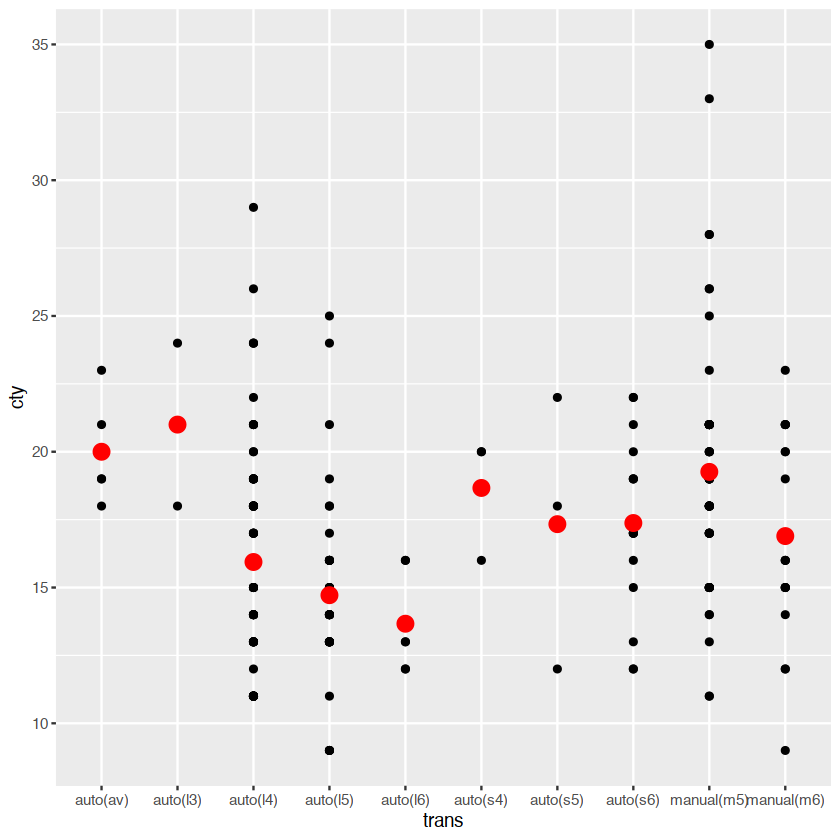

In [53]:
ggplot(mpg,aes(trans,cty))+
    geom_point()+
    stat_summary(geom="point",fun="mean",color="red",size=4)


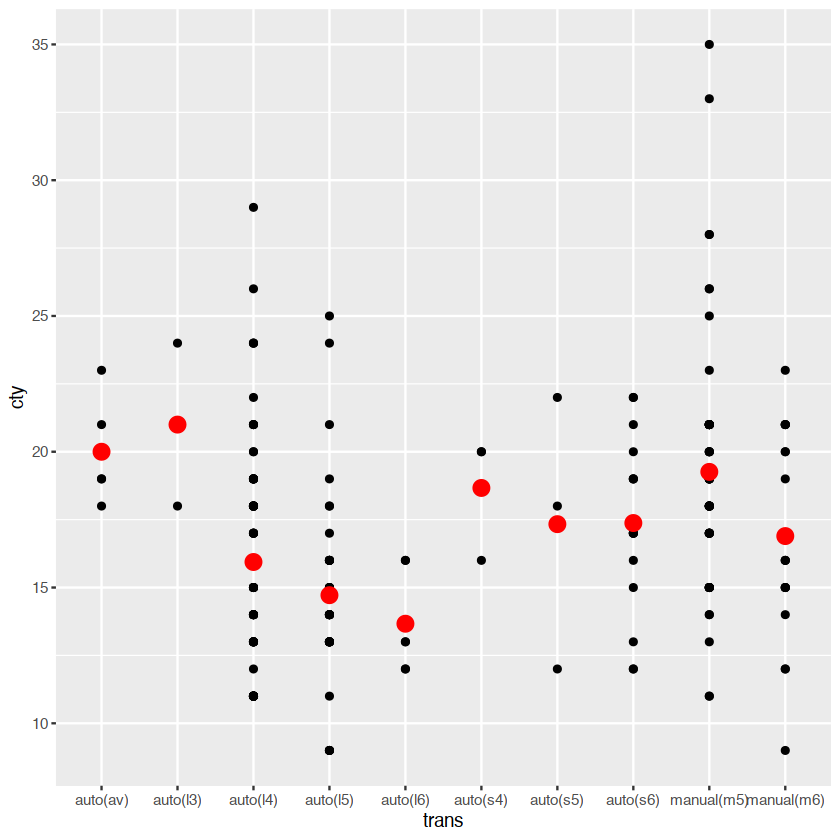

In [54]:
ggplot(mpg,aes(trans,cty))+
    geom_point()+
    geom_point(stat="summary",fun="mean",color="red",size=4)


the way to use these functions. you can either add a `stat_()` function and override the default geom or add a `geom_()` function and override the default stat:

#### generated variables

a stat takes a data frame as input and returns a data frame as output, and so a stat can add new variables to the original dataset. it is possible to map aesthetics to these new variables.
 example: `stat_bin` 用于构建`histogram` 产生一系列的变量：
- `count`,the number of observation in each bin
- `density` the density of observation in each bin
- `x` the centre of the bin

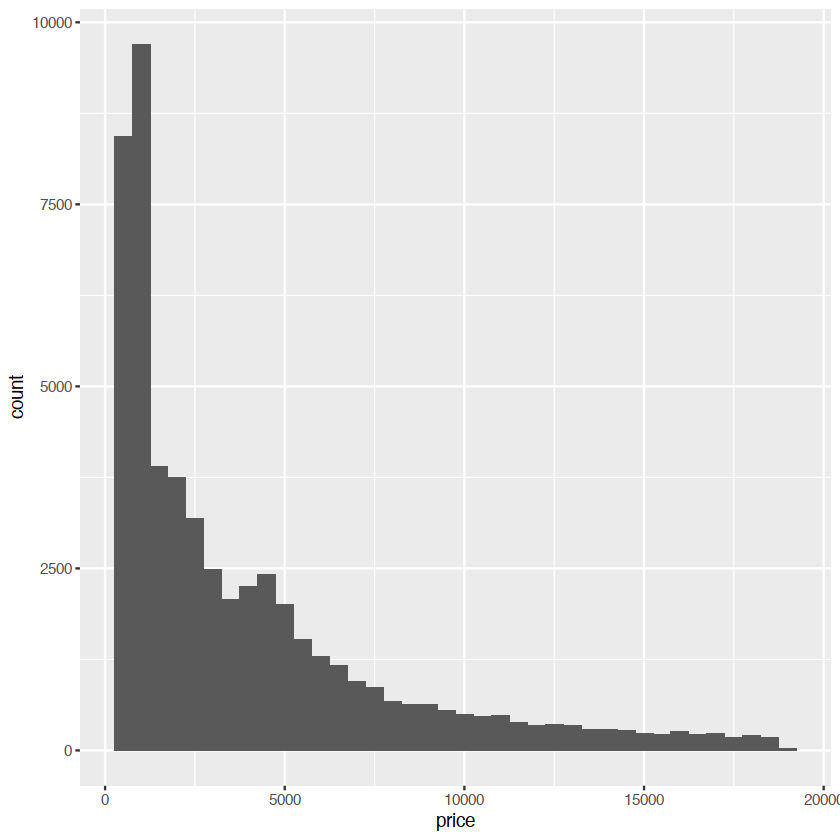

In [59]:
ggplot(diamonds,aes(price))+
    geom_histogram(binwidth = 500)

the `after_stat()` must wrap the name, preventing the confusion in case the original dataset includes a variables with the same name as a generated variable

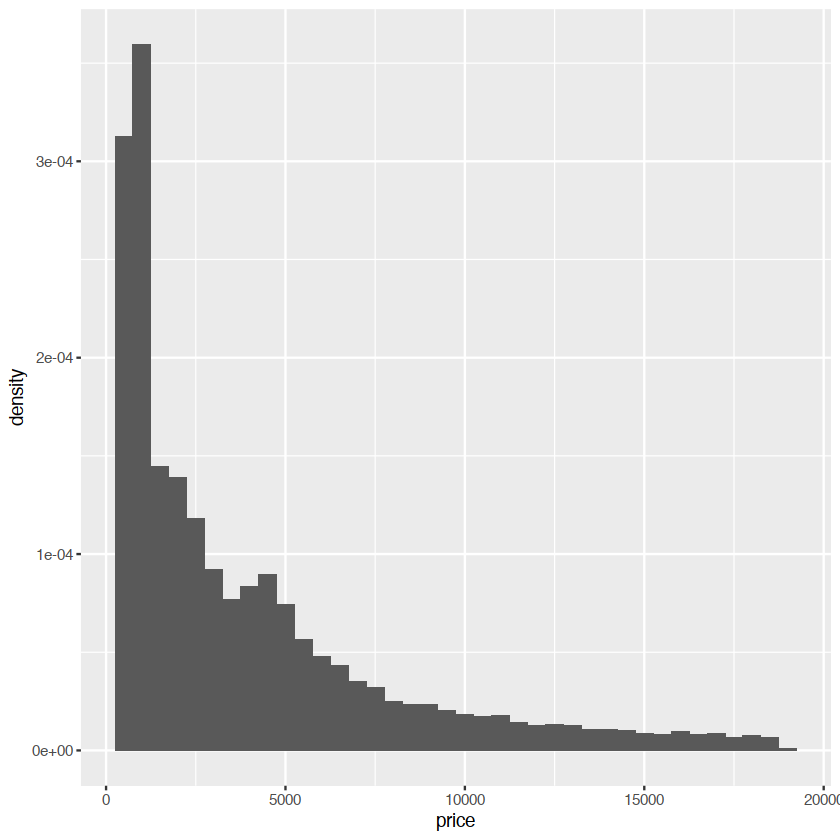

In [58]:
ggplot(diamonds,aes(price))+
    geom_histogram(aes(y = after_stat(density)),binwidth=500)

### scale and guides

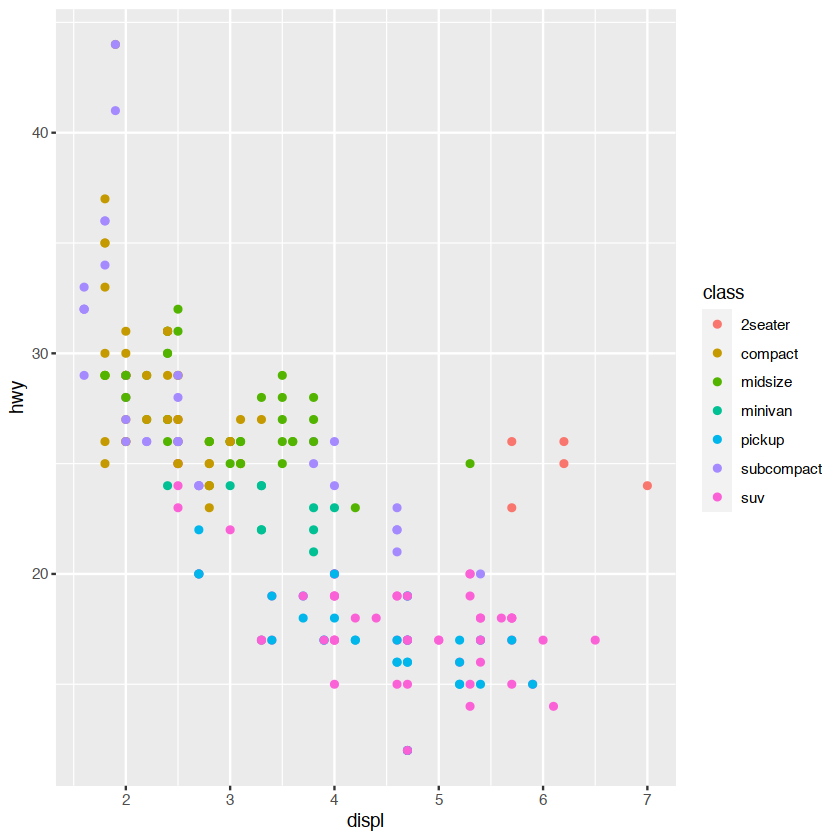

In [60]:
ggplot(mpg, aes(displ, hwy)) + 
  geom_point(aes(colour = class))